<a href="https://colab.research.google.com/github/JingweiYi/MSE590-Homework/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy==1.26.4
!pip install python-ternary
!pip install scikit-learn-extra

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177961 sha256=ba32fba87fdc9b230336d7790b41eb2d90e334025b8daca738b3a77d49515c06
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as nm
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from pathlib import Path

In [10]:
import scipy.io as sio
import ternary

from scipy.spatial.distance import correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from pathlib import Path

# 1. Open the data, perform basic data preparation


In [18]:
HW_3 = Path("/content/drive/MyDrive/MSE 591/Homework 3/")
assert HW_3.exists()
temperature_file = HW_3 / "VO2 - Nb2O3 Composition and temp Combiview.txt"
assert temperature_file.exists()
xrd_file = HW_3 / "VO2 -Nb2O3 XRD Combiview.txt"
assert xrd_file.exists()

In [12]:
## Visualize temperature_file data
df = pd.read_csv(temperature_file, delimiter='\t')
df = df.dropna(axis=1)
df_comp = df
df_comp

,V,temp
0,99,23
1,98,23
2,97,23
3,96,23
4,95,23
...,...,...
347,59,68
348,58,68
349,57,68
350,56,68


In [26]:
## Visualize xrd_file data
df = pd.read_csv(xrd_file, delimiter='\t')
df = df.dropna(axis=1)
df_xrd = df
df_xrd

,18,18.005,18.01,18.015,18.02,18.025,18.03,18.035,18.04,18.045,...,37.155,37.16,37.165,37.17,37.175,37.18,37.185,37.19,37.195,37.2
0,51.848660,52.834038,51.174835,53.052490,56.399612,56.071865,56.815231,56.848331,54.538723,53.689186,...,30.001499,31.416891,32.066299,31.763731,29.936586,29.578611,30.885338,31.696762,30.618622,30.386976
1,56.722721,53.881912,50.671062,51.321934,51.556866,52.253277,55.718475,54.416790,51.783272,52.114933,...,36.225739,36.308441,36.801197,34.759724,33.528366,32.918938,33.996967,37.048428,36.566868,32.096848
2,58.148319,52.507820,49.679859,50.496136,54.162167,56.740105,57.224972,57.081902,54.456417,51.681507,...,35.979317,36.018536,37.044678,37.575008,36.818207,35.648510,34.063965,35.145317,36.675240,35.317139
3,51.148743,51.590397,55.766472,53.936325,52.004356,55.977509,56.503899,55.611641,57.211300,57.517410,...,36.787567,34.973251,35.419075,34.981800,35.143005,33.491112,34.419773,35.162094,34.798779,34.817390
4,56.481380,52.678493,49.691280,48.899235,50.078491,53.187347,55.538841,56.982971,59.650421,60.144733,...,36.955875,37.824177,39.030418,39.253719,38.017082,36.436962,34.331112,33.690659,34.349812,32.904148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,40.901459,47.396652,49.099792,51.097443,51.742306,53.553268,52.516907,53.008381,50.747475,51.867065,...,25.358341,22.654335,21.374512,21.675337,21.396185,20.797394,22.530458,22.746065,22.748341,21.914745
348,45.506199,43.203918,41.382946,47.477726,51.203621,51.005150,48.493797,50.512520,51.318714,49.411053,...,22.675154,22.615984,21.573301,19.778120,18.987162,20.648264,21.993969,23.175468,22.582804,21.200132
349,46.754883,50.500679,51.893440,51.154343,53.198479,56.229660,53.143883,51.279316,51.223999,54.934631,...,22.791384,20.463097,20.116655,22.593084,23.883232,23.694214,21.763630,21.361065,22.729845,23.150787
350,45.477982,45.977322,52.736259,52.790535,48.212242,45.245575,49.406433,50.787968,49.375885,51.123863,...,22.247559,20.429379,22.198467,24.878576,24.843079,21.732872,19.722658,22.834042,23.213221,22.069782


In [32]:
# Extract 2θ values
two_theta = np.array(df_xrd.columns[1:], dtype=float)
xrd_data = df_xrd.values[:, 1:].astype(float)

print(f"2θ range: {two_theta.min():.2f} to {two_theta.max():.2f}")

2θ range: 18.00 to 37.20


# 2. Demonstrate your ability to plot and navigate the data by:

  ## 2(a) Generating a composition versus temperature plot with each

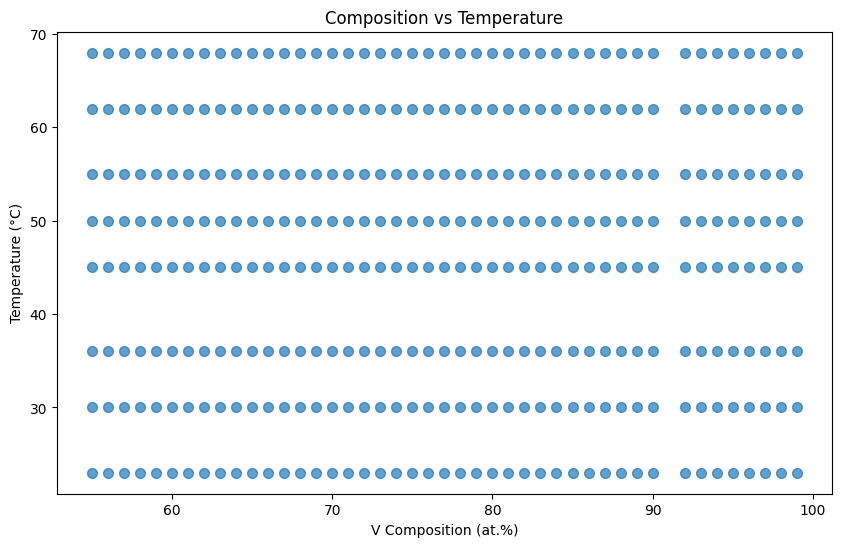

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df_comp['V'], df_comp['temp'], alpha=0.7, s=50)
plt.xlabel('V Composition (at.%)')
plt.ylabel('Temperature (°C)')
plt.title('Composition vs Temperature')
plt.show()

  ## 2(b) Generate an X-ray diffraction versus temperature plots for a constant V composition of 99 at.%

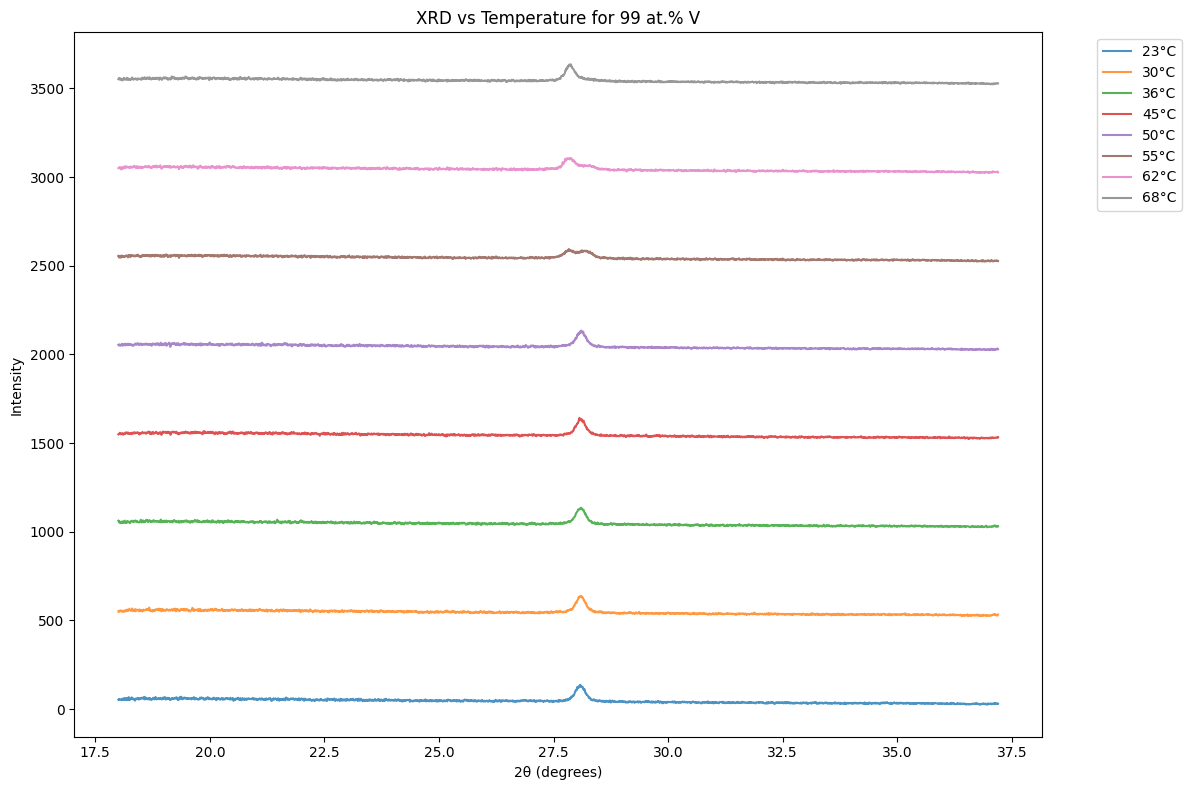

In [51]:
v_99_mask = df_comp['V'] == 99
v_99_temps = df_comp.loc[v_99_mask, 'temp']
v_99_xrd = xrd_data[v_99_mask]

plt.figure(figsize=(12, 8))
for i, (temp, pattern) in enumerate(zip(v_99_temps, v_99_xrd)):
    plt.plot(two_theta, pattern + i*500, label=f'{temp}°C', alpha=0.8)

plt.xlabel('2θ (degrees)')
plt.ylabel('Intensity')
plt.title('XRD vs Temperature for 99 at.% V')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 2(c) Generate an X-ray diffraction versus composition plot for a constant temperature of 23 ºC

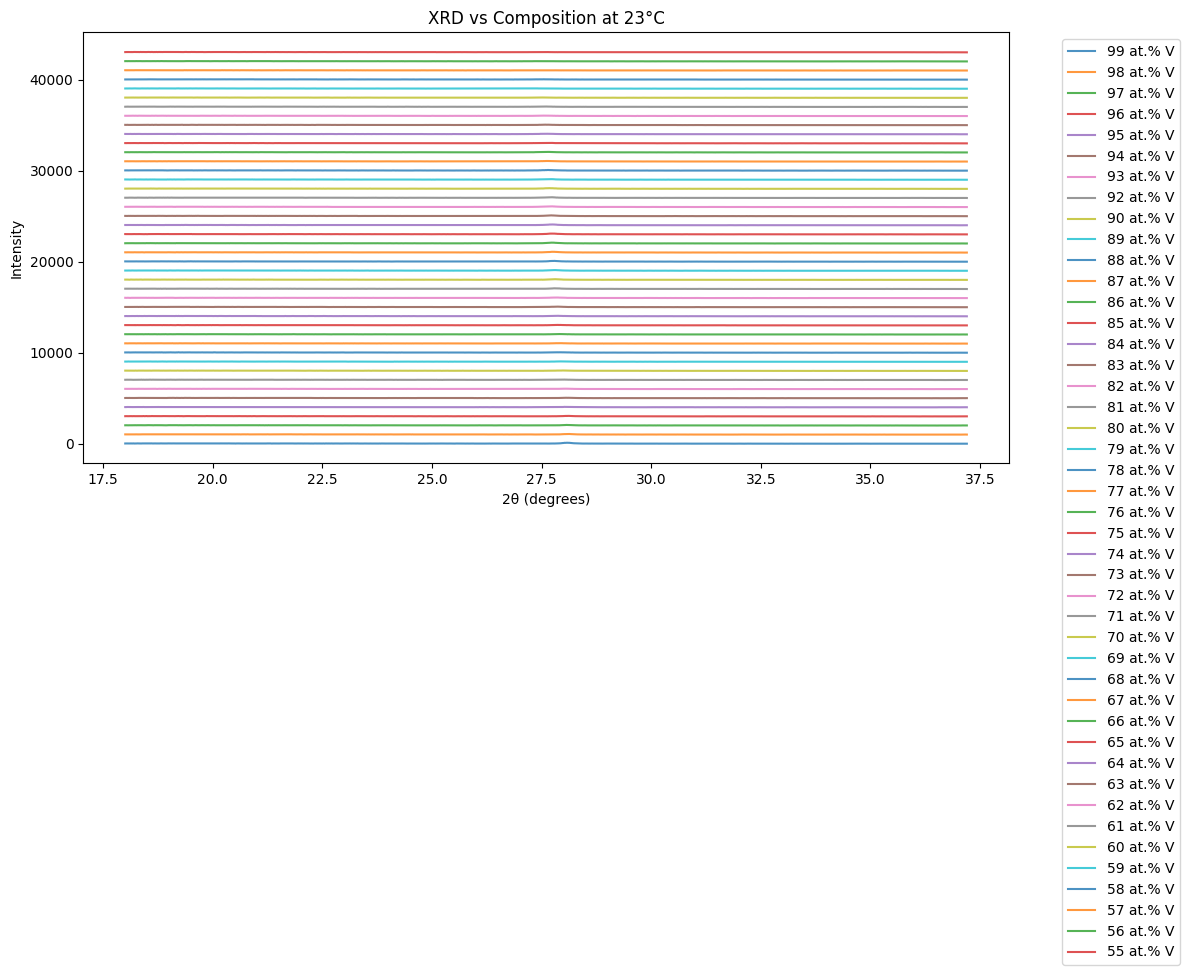

In [52]:
temp_23_mask = df_comp['temp'] == 23
temp_23_comps = df_comp.loc[temp_23_mask, 'V']
temp_23_xrd = xrd_data[temp_23_mask]

plt.figure(figsize=(12, 8))
for i, (comp, pattern) in enumerate(zip(temp_23_comps, temp_23_xrd)):
    plt.plot(tth, pattern + i*1000, label=f'{comp} at.% V', alpha=0.8)

plt.xlabel('2θ (degrees)')
plt.ylabel('Intensity')
plt.title('XRD vs Composition at 23°C')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Use PCA for dimensional reduction on the diffraction data

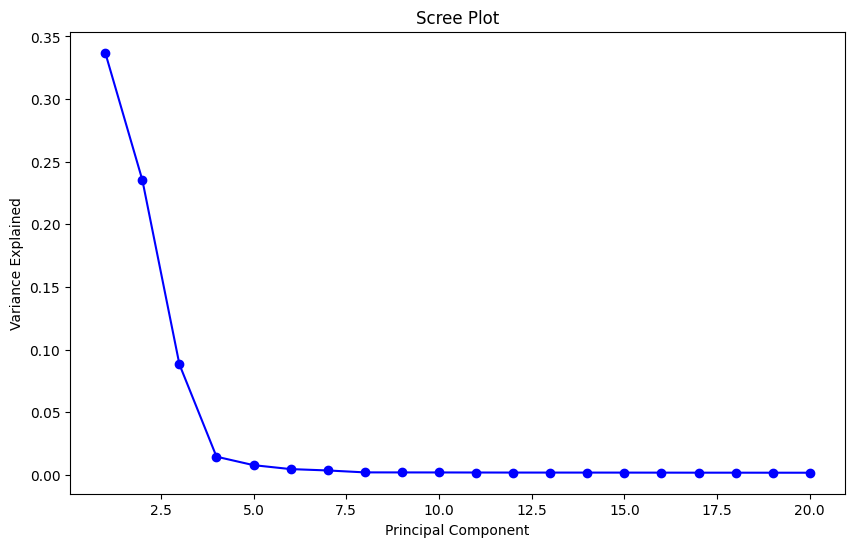

In [53]:
# PCA Analysis
n_components = min(xrd_data.shape[0], xrd_data.shape[1])
pca = PCA(n_components=n_components)
pca.fit(xrd_data)
pos = pca.transform(xrd_data)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), explained_variance_ratio[:20], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# 4. Plot the diffraction patterns in reduced dimensional space with a false color plot

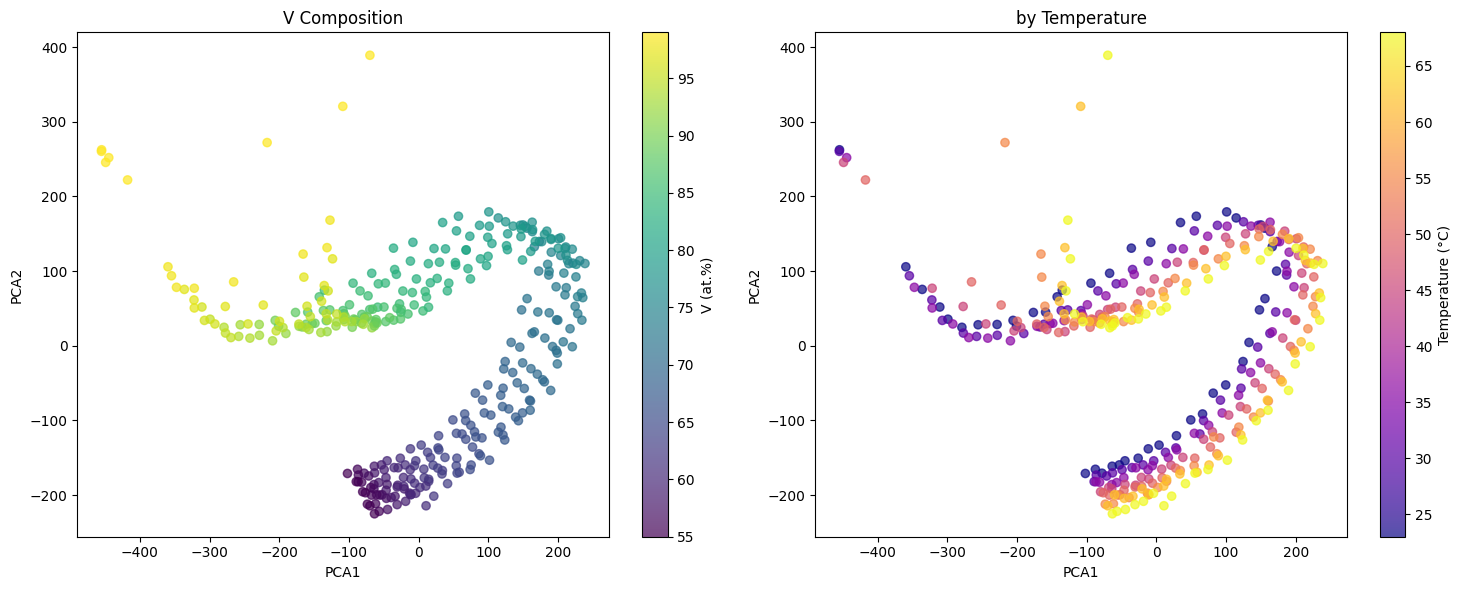

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Color by composition
sc1 = ax1.scatter(pos[:, 0], pos[:, 1], c=df_comp['V'], cmap='viridis', alpha=0.7)
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_title('V Composition')
plt.colorbar(sc1, ax=ax1, label='V (at.%)')

# Color by temperature
sc2 = ax2.scatter(pos[:, 0], pos[:, 1], c=df_comp['temp'], cmap='plasma', alpha=0.7)
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_title('by Temperature')
plt.colorbar(sc2, ax=ax2, label='Temperature (°C)')

plt.tight_layout()
plt.show()

# 5. Perform a series of clustering analyses to attempt to get phase regions as similar as possible to the human expert phase mapping exercise

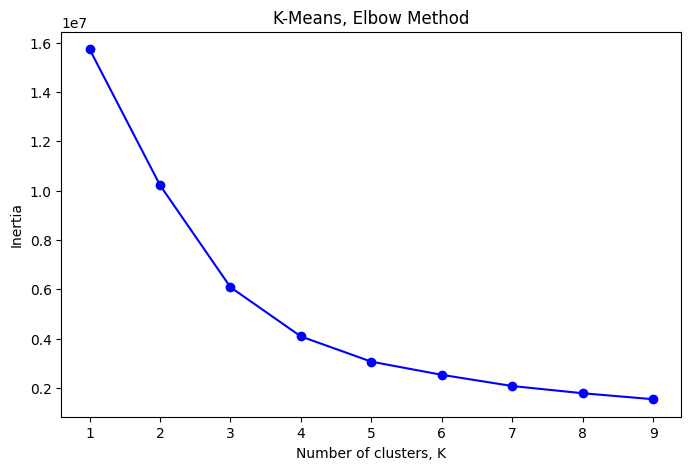

In [55]:
n_pca_components = 5
pos_reduced = pos[:, :n_pca_components]

# Elbow method
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pos_reduced)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.show()

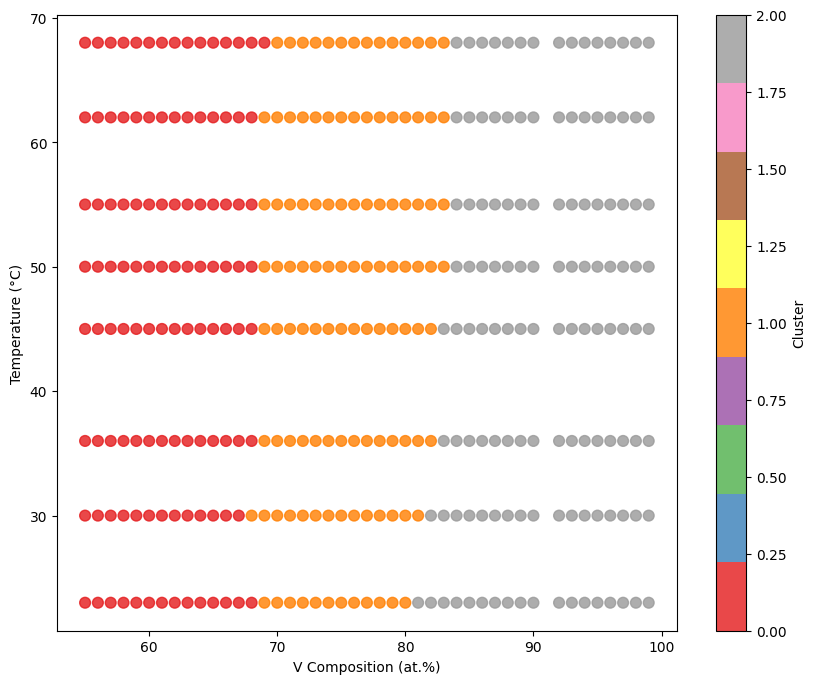

In [56]:
# Perform K-means clustering with optimal k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pos_reduced)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_comp['V'], df_comp['temp'], c=cluster_labels,
                     cmap='Set1', s=60, alpha=0.8)
plt.xlabel('V Composition (at.%)')
plt.ylabel('Temperature (°C)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Summary

**What worked well:**
1. PCA effectively reduced the high-dimensional XRD data while preserving most
variance
2. K-means clustering with k=3 successfully identified distinct phase regions

**Lessons learned about the dataset:**
1. The first 5 principal components capture most of the variance in XRD patterns, suggesting that phase changes manifest in relatively low-dimensional features
2. Clusters correspond well with expected phase behavior: high-V compositions at lower temperatures form one phase, while increasing Nb content and temperature leads to phase transitions

**Physical interpretation:**
1. Cluster 0 (monoclinic): Dominates at higher V concentrations and lower temperatures
2. Cluster 1 (monoclinic + tetragonal): Intermediate compositions and temperatures  
3. Cluster 2 (tetragonal): Higher temperatures and lower V concentrations
